In [1]:
import pandas as pd

In [2]:
nba = pd.read_csv('NBA_train.csv')

In [3]:
nba.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533


- W - Wins
- PTS - Points
- oppPTS - Opponent's Points
- ORB - Offensive Rebounds
- DRB - Defensive Rebounds
- AST - Assists
- STL - Steals
- BLK - Blocks
- TOV - TurnOvers
- There are some more variables with similar names such as FG, FGA (includes attempts)
- FG - Field Goals
- FGA - Field Goal Attempted
- 2P - 2 Pointers
- 2PA - 2 Pointer Attempted
- 3P - 3 Pointers
- 3PA - 3 Pointers Attempted
- FT - Free Throws
- FTA - Free Throws Attempted

In [4]:
pd.crosstab(index=nba['W'], columns=nba['Playoffs'], margins=True)

Playoffs,0,1,All
W,,,
11,2,0,2
12,2,0,2
13,2,0,2
14,2,0,2
15,10,0,10
16,2,0,2
17,11,0,11
18,5,0,5
19,10,0,10


#### From the table above, we see that when a team wins at least 41 games, they have a good chance to make it to the playoffs. The table shows that sometimes the teams made it to the playoffs by winning 35 games.

#### In basketball, games are won by scoring more points than your opponents do. Does the difference in points have any impact on the number of wins?

In [5]:
nba['PointsDiff'] = nba['PTS'] - nba['oppPTS']

In [6]:
nba.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,...,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PointsDiff
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,...,75,2038,2645,1369,2406,1913,782,539,1495,239
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,...,422,1907,2449,1227,2457,2198,809,308,1539,639
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,...,275,2019,2592,1115,2465,2152,704,392,1684,-222
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,...,187,1702,2205,1307,2381,2108,764,342,1370,28
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,...,255,1871,2539,1311,2524,2079,746,404,1533,-362


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

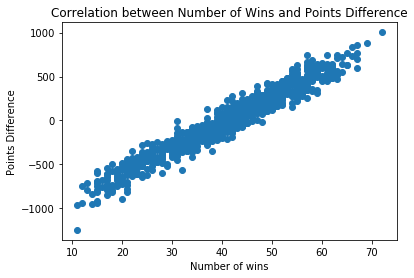

In [8]:
plt.scatter(nba['W'], nba['PointsDiff'])
plt.xlabel('Number of wins')
plt.ylabel('Points Difference')
plt.title('Correlation between Number of Wins and Points Difference')

#### Here we see that there is indeed a strong correlation between the number of wins and the points difference (PointsDiff)

In [11]:
from sklearn import linear_model

In [12]:
linearRegression = linear_model.LinearRegression()

In [13]:
X_train = nba[['PointsDiff']]
y_train = nba[['W']]

In [14]:
linearRegression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
linearRegression.coef_

array([[ 0.03258633]])

In [16]:
linearRegression.intercept_

array([ 41.])

#### So how much should the 'PointsDiff' be for a team to make it to the playoffs by winning at least 42 games?

#### W = 41 + 0.0326 (PointsDiff) >= 42
#### PointsDiff = (42 - 41) / 0.0326
#### PointsDiff = 30.67

#### Let's predict how to score more points

In [18]:
X_train_points = nba[['2PA', '3PA', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV' ]]

In [19]:
y_train_points = nba[['PTS']]

In [20]:
linearRegression.fit(X_trains_points, y_train_points)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
linearRegression.coef_

array([[ 1.04287845,  1.25859058,  1.12801702, -0.95538673,  0.03882744,
         0.88576709, -0.19917749, -0.05576374, -0.0247526 ]])

In [22]:
linearRegression.intercept_

array([-2050.81081277])

In [23]:
linearRegression.residues_

C:\Users\Vivek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


array([ 28394313.99475665])

#### So SSE is 28394313.99475665

In [27]:
import math

In [28]:
RMSE = math.sqrt((linearRegression.residues_[0] / len(nba)))
RMSE

C:\Users\Vivek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


184.40489814749066

#### The Root Mean Squared Error value is 184.404 which is quite high. Let's check the average number of points to see if the error is high or low

In [30]:
nba['PTS'].describe()

count      835.000000
mean      8370.239521
std        581.040114
min       6901.000000
25%       7934.000000
50%       8312.000000
75%       8784.500000
max      10371.000000
Name: PTS, dtype: float64

#### The mean is 8370.239521. So the RMSE value of 184 (being off by 184 points)  is not bad in this case.

#### We can try to remove the variables that don't have much impact on the model such as 'TOV', 'DRB', and 'BLK'.